In [1]:
# python пакеты
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# Мои пакеты

# Модели
from models import *

# Генерирование параметров модели
from model_params import Settings

# Фиттинг 
from auto_fit import main

In [3]:
# Инициализация
sets = Settings()

Вот диапазон параметов по которым выбирается значения диска и балджа:

- $ I_e : e^{4.5} \sim e^8$
- $n : 0.5 \sim 5 $
- $B/D : 0.1 \sim 0.25$
- $ h_1 : 1 \sim 7 kpc$
- $\log r_e = 2.25 - 0.355 \log(I_e)$

n [2.29779378] BD [0.14247904]


/tmp/ipykernel_2378029/552257772.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(d1), '-', color='magenta')


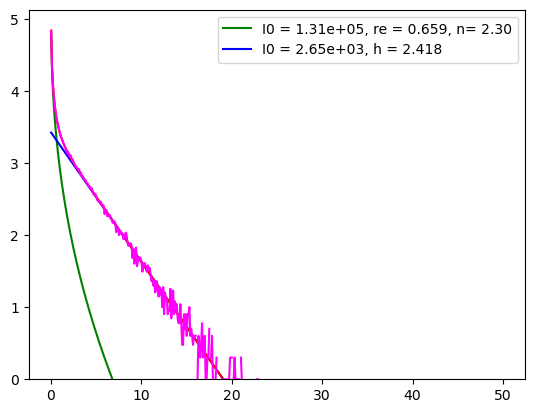

In [4]:
# Проверка параметров
x = np.arange(0.01, 50, 0.1)

s_I0, re, n, d_I0, h = sets.generate_galaxy()
d = sersic(x, s_I0, re, n)+ exp(x, d_I0, h)

# Шум Пуассона
d1 =  np.random.poisson(d)

plt.figure()


plt.plot(x, np.log10(sersic(x, s_I0, re, n)), '-g', label='I0 = %3.2e, re = %5.3f, n=%5.2f' %(s_I0[0], re[0], n[0]))
plt.plot(x, np.log10(exp(x, d_I0, h)), '-b', label = 'I0 = %3.2e, h = %5.3f' %(d_I0[0], h[0]))
plt.plot(x, np.log10(d), '-r')
plt.plot(x, np.log10(d1), '-', color='magenta')
plt.ylim(0, np.log10(s_I0+d_I0))
plt.legend()
plt.show()

  0%|                                                     | 0/5 [00:00<?, ?it/s]/home/android/Документы/Jupyter_Notebook/EAGLE_breaks/models.py:26: RuntimeWarning: divide by zero encountered in divide
  return I0*np.exp(-r/h)
/home/android/Документы/Jupyter_Notebook/EAGLE_breaks/auto_fit.py:78: RuntimeWarning: divide by zero encountered in scalar divide
  h_ = loge * (dl - dr)/ (mul - mur)
100%|█████████████████████████████████████████████| 5/5 [00:13<00:00,  2.61s/it]


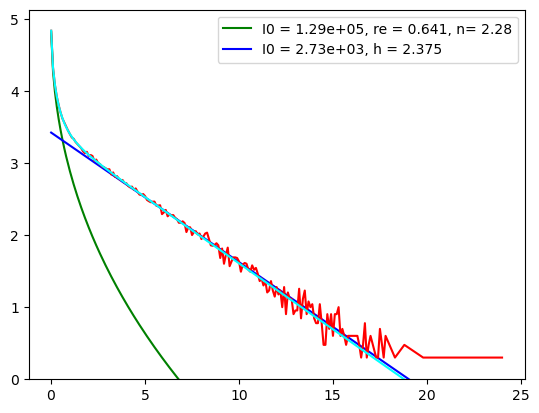

In [5]:
# Одиночная проверка правильности подгонки
x1 = x[np.where(d1 > 0)]
y1 = d1[np.where(d1 > 0)]

x1 = x1[np.where(np.log10(y1) > 0)]
y1 = y1[np.where(np.log10(y1) > 0)]


pd_, pd_err_, ps_, ps_err_, chi_min, sr_min, dl_min = main(x1, y1, exp, np.sqrt(y1), key='1')
m = sersic(x1, *ps_)+ exp(x1, *pd_)
plt.figure()
plt.plot(x1, np.log10(sersic(x1, s_I0, re, n)), '-g', label='I0 = %3.2e, re = %5.3f, n=%5.2f' %(ps_[0], ps_[1], ps_[2]))
plt.plot(x1, np.log10(exp(x1, d_I0, h)), '-b', label='I0 = %3.2e, h = %5.3f' %(pd_[0], pd_[1]))
plt.plot(x1, np.log10(y1), '-r')
plt.plot(x1, np.log10(m), '-', color='cyan')
plt.ylim(0, np.log10(s_I0+d_I0))
plt.legend()
plt.show()

n [3.0721691] BD [0.11844235]


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.55s/it]

t= 17.75930666923523


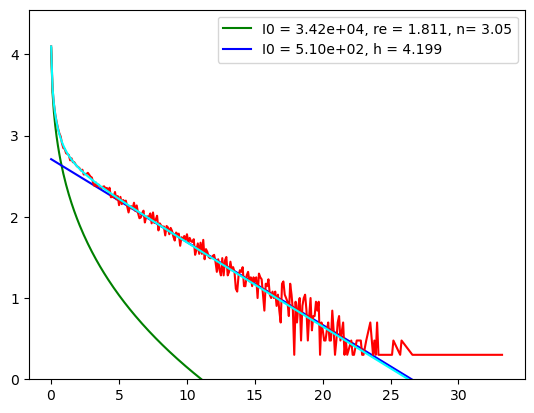

n [0.58587667] BD [0.18641197]


 20%|█████████                                    | 1/5 [00:04<00:16,  4.01s/it]/usr/lib/python3/dist-packages/astropy/modeling/functional_models.py:874: RuntimeWarning: divide by zero encountered in divide
  -cls._gammaincinv(2 * n, 0.5) * ((r / r_eff) ** (1 / n) - 1)
100%|█████████████████████████████████████████████| 5/5 [00:16<00:00,  3.30s/it]

t= 16.52212357521057


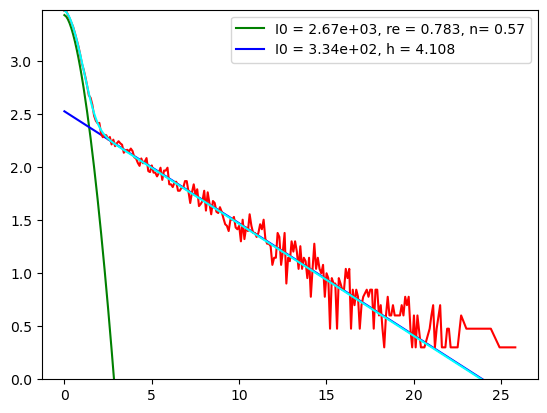

n [1.22482578] BD [0.24374801]


100%|█████████████████████████████████████████████| 5/5 [00:14<00:00,  2.94s/it]

t= 14.704901218414307


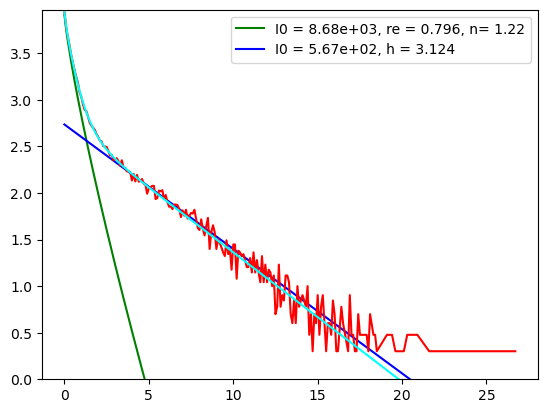

n [1.22230659] BD [0.23305759]


100%|█████████████████████████████████████████████| 5/5 [00:12<00:00,  2.44s/it]

t= 12.195773839950562


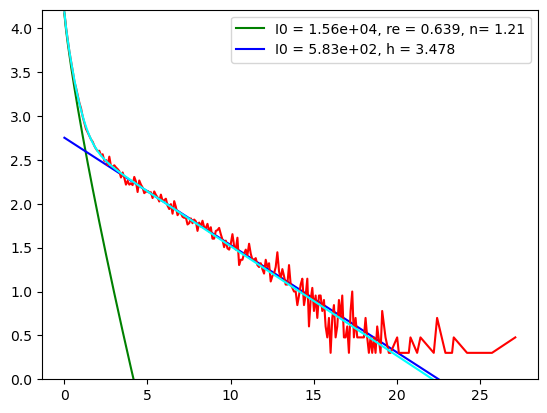

n [1.39266382] BD [0.18833815]


100%|█████████████████████████████████████████████| 5/5 [00:11<00:00,  2.38s/it]

t= 11.882121324539185


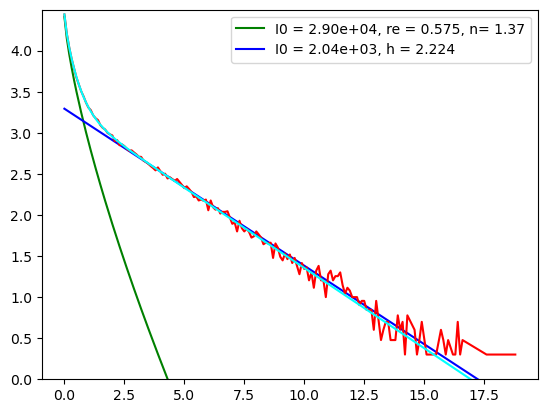

n [4.89144267] BD [0.24473127]


100%|█████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]

t= 19.63221025466919


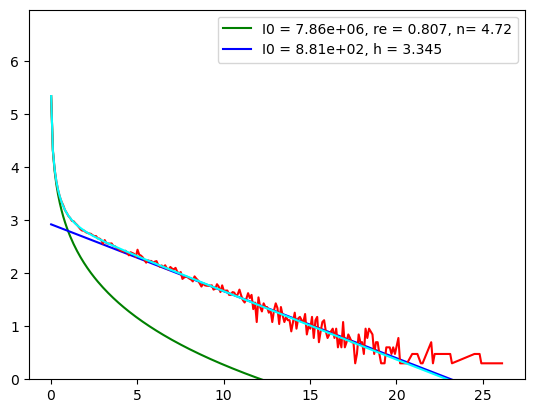

n [3.14391591] BD [0.18291977]


100%|█████████████████████████████████████████████| 5/5 [00:14<00:00,  2.91s/it]

t= 14.55508017539978


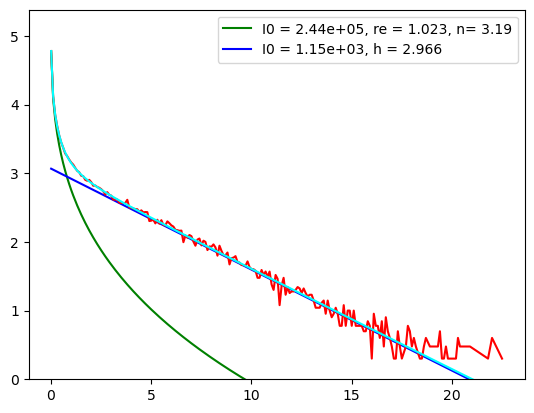

n [2.47191611] BD [0.16211001]


100%|█████████████████████████████████████████████| 5/5 [00:14<00:00,  2.84s/it]

t= 14.183884620666504


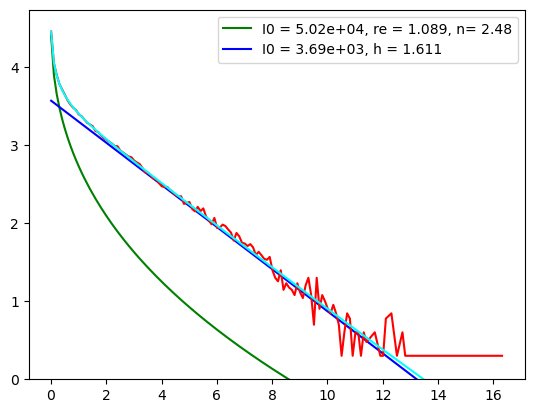

n [2.79226167] BD [0.13032532]


100%|█████████████████████████████████████████████| 5/5 [00:19<00:00,  3.96s/it]

t= 19.823373317718506


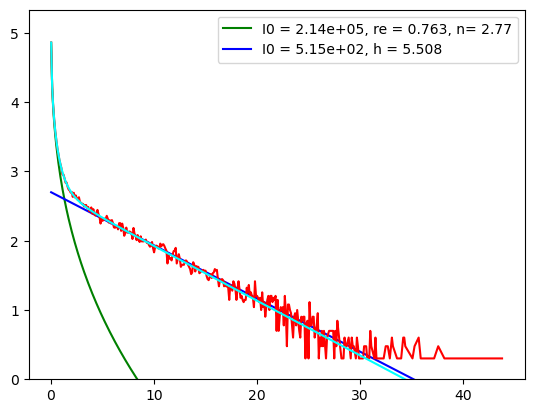

n [3.19214306] BD [0.10632052]


100%|█████████████████████████████████████████████| 5/5 [00:15<00:00,  3.03s/it]

t= 15.17237114906311


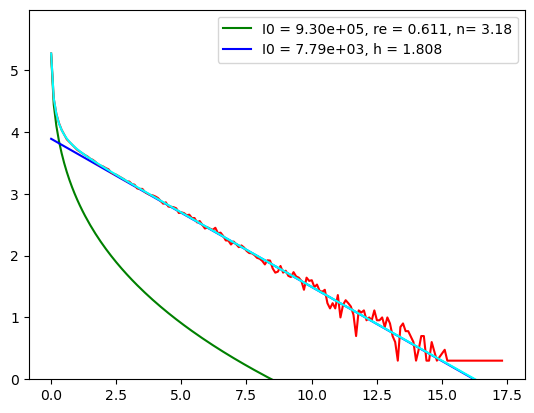

In [6]:
# Статистическая проверка фиттинга простой модели диск + балдж
import time
sI0_init = []
dI0_init = []
re_init = []
n_init = []
h_init = []

sI0_res = []
dI0_res = []
re_res = []
n_res = []
h_res = []

for _ in range(10):
    s_I0, re, n, d_I0, h = sets.generate_galaxy()
    
    sI0_init.append(s_I0)
    dI0_init.append(d_I0)
    re_init.append(re)
    n_init.append(n)
    h_init.append(h)
    
    d = sersic(x, s_I0, re, n)+ exp(x, d_I0, h)

    # Шум Пуассона
    d1 =  np.random.poisson(d)
    
    # Убираем плохие данные
    x1 = x[np.where(d1 > 0)]
    y1 = d1[np.where(d1 > 0)]

    # Делаем обрезку по радиусу
    x1 = x1[np.where(np.log10(y1) > 0)]
    y1 = y1[np.where(np.log10(y1) > 0)]
    
    # Фиттинг моделью диск + балдж
    start = time.time()
    pd_, pd_err_, ps_, ps_err_, chi_min, sr_min, dl_min = main(x1, y1, exp, np.sqrt(y1), key='1')
    print('t=', time.time() - start)
    sI0_res.append(ps_[0])
    dI0_res.append(pd_[0])
    re_res.append(ps_[1])
    n_res.append(ps_[2])
    h_res.append(pd_[1])
    plt.figure()
    m = sersic(x1, *ps_)+ exp(x1, *pd_)
    
    plt.plot(x1, np.log10(sersic(x1, s_I0, re, n)), '-g', label='I0 = %3.2e, re = %5.3f, n=%5.2f' %(ps_[0], ps_[1], ps_[2]))
    plt.plot(x1, np.log10(exp(x1, d_I0, h)), '-b', label='I0 = %3.2e, h = %5.3f' %(pd_[0], pd_[1]))
    plt.plot(x1, np.log10(y1), '-r')
    plt.plot(x1, np.log10(m), '-', color='cyan')
    plt.ylim(0, np.log10(s_I0+d_I0))
    plt.legend()
    plt.show()

[1.81087591 0.78290616 0.79649182 0.63924806 0.57460482 0.80714668
 1.02298918 1.08913916 0.76324807 0.61102052]
[4.19862213 4.10842647 3.12395058 3.47774122 2.22440316 3.34492285
 2.96587819 1.61053868 5.50773881 1.80775867]
[3.04782031 0.57484741 1.21847022 1.21070126 1.36677381 4.71646462
 3.19429982 2.48454678 2.76750524 3.17848668]


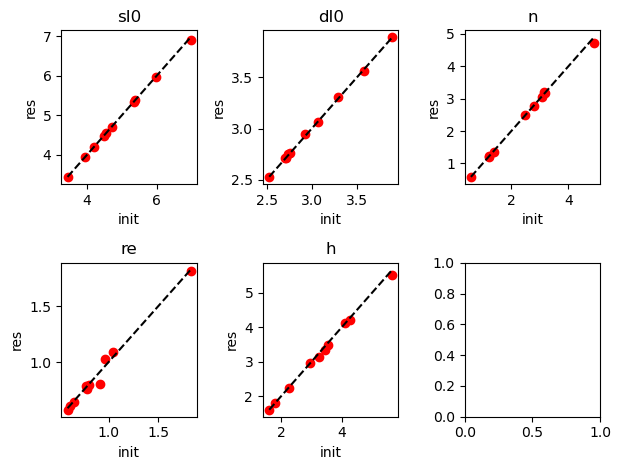

In [8]:
fig, ax = plt.subplots(2,3)
sI0_init = np.array(sI0_init)
sI0_res = np.array(sI0_res)
ax[0,0].plot(np.log10(sI0_init), np.log10(sI0_res), 'or')
ax[0,0].plot(sorted(np.log10(sI0_init)), sorted(np.log10(sI0_init)), '--k')
ax[0,0].set_title('sI0')
ax[0,0].set_xlabel('init')
ax[0,0].set_ylabel('res')

dI0_init = np.array(dI0_init)
dI0_res = np.array(dI0_res)
ax[0,1].plot(np.log10(dI0_init), np.log10(dI0_res), 'or')
ax[0,1].plot(sorted(np.log10(dI0_init)), sorted(np.log10(dI0_init)), '--k')
ax[0,1].set_title('dI0')
ax[0,1].set_xlabel('init')
ax[0,1].set_ylabel('res')

n_init = np.array(n_init)
n_res = np.array(n_res)
ax[0,2].plot(n_init, n_res, 'or')
ax[0,2].plot(sorted(n_init), sorted(n_init), '--k')
ax[0,2].set_title('n')
ax[0,2].set_xlabel('init')
ax[0,2].set_ylabel('res')

re_init = np.array(re_init)
re_res = np.array(re_res)
ax[1,0].plot(re_init, re_res, 'or')
ax[1,0].plot(sorted(re_init), sorted(re_init), '--k')
ax[1,0].set_title('re')
ax[1,0].set_xlabel('init')
ax[1,0].set_ylabel('res')


h_init = np.array(h_init)
h_res = np.array(h_res)
ax[1,1].plot(h_init, h_res, 'or')
ax[1,1].plot(sorted(h_init), sorted(h_init), '--k')
ax[1,1].set_title('h')
ax[1,1].set_xlabel('init')
ax[1,1].set_ylabel('res')
print(re_res)
print(h_res)
print(n_res)
plt.tight_layout()